In [ ]:
!pip install scikit-plot


In [1]:
#Instalando o xgboost
!pip install xgboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score,confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,roc_curve,auc,r2_score
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats
from sklearn.model_selection import cross_val_score
from imblearn.metrics import specificity_score
import matplotlib.pyplot  as pyplot
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be import

In [ ]:
#uploaded = files.upload()

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv',sep=',');
df_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
#Separar os atributos previsores da classe
#Criando um dataFrame realizar o One-Hot encoder
previsores_df = df_train.iloc[:,1:11] 
#df_train[df_train.columns[1:11]]
#Aqui quer dizer que irei percorrer todas as linas inserir em classe a coluna  12
classe = df_train.iloc[:,11].values
#Exibir os valores
print(classe)

[1 0 1 ... 0 0 0]


In [5]:
previsores_df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39


**Atributo Gender**

**Converter para número com o One-Hot Encoder. O One-Hot Encoder foi selecionado pois ele atribui valores numéricos sem dar um peso ou hierarquia.  Nessa estratégia, cada valor de categoria é convertido em uma nova coluna e atribuído um valor 1 ou 0 (notação para verdadeiro / falso) à coluna.**

In [6]:
#oneHotEncoder com a função  get_dummies do pandas
#Agora tentando remodelar com (-1, 1). Fornecemos coluna como 1, mas linhas como desconhecidas
previsores_df = pd.concat([previsores_df,pd.get_dummies(previsores_df['Gender'], prefix='Gender')],axis=1)
previsores_df.drop(['Gender'],axis=1, inplace=True)

In [8]:
previsores_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male
0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,0,1
1,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,1
2,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,0,1
3,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,1
4,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,1,0


**Atributo Vehicle_Age**

**Converter para número o Vehicle_Age. Usarei o encoder:**



In [9]:
# Transformação dos atributos categóricos em atributos numéricos.
labelencoder = LabelEncoder()
previsores_df['Vehicle_Age'] = labelencoder.fit_transform(previsores_df['Vehicle_Age'])
group = previsores_df.groupby(['Vehicle_Age']).size()
group

Vehicle_Age
0    200316
1    164786
2     16007
dtype: int64

In [10]:
previsores_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male
0,44,1,28.0,0,2,Yes,40454.0,26.0,217,0,1
1,76,1,3.0,0,0,No,33536.0,26.0,183,0,1
2,47,1,28.0,0,2,Yes,38294.0,26.0,27,0,1
3,21,1,11.0,1,1,No,28619.0,152.0,203,0,1
4,29,1,41.0,1,1,No,27496.0,152.0,39,1,0


**Atributo Vehicle_Damage. Farei a converão para número manualmente**	

In [11]:
previsores_df.loc[previsores_df['Vehicle_Damage']=='No','Vehicle_Damage'] = '0'
previsores_df.loc[previsores_df['Vehicle_Damage']=='Yes','Vehicle_Damage'] = '1'
group = previsores_df.groupby(previsores_df['Vehicle_Damage']).size()
group

Vehicle_Damage
0    188696
1    192413
dtype: int64

In [12]:
previsores_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male
0,44,1,28.0,0,2,1,40454.0,26.0,217,0,1
1,76,1,3.0,0,0,0,33536.0,26.0,183,0,1
2,47,1,28.0,0,2,1,38294.0,26.0,27,0,1
3,21,1,11.0,1,1,0,28619.0,152.0,203,0,1
4,29,1,41.0,1,1,0,27496.0,152.0,39,1,0


**Normalizando. Essa está desativada, pois irei fazer de uma só vez em todas as variáveis de uma vez**

In [ ]:
#Normalizando o atributo Annual_Premium
'''min_p = min(previsores_df['Annual_Premium'])
max_p = max(previsores_df['Annual_Premium'])
print(min_p)
print(max_p)
previsores_df['Annual_Premium'] = (previsores_df['Annual_Premium'] - min_p) / (max_p - min_p)

#Normalizando o atributo Region_Code
min_p = min(previsores_df['Region_Code'])
max_p = max(previsores_df['Region_Code'])
print(min_p)
print(max_p)
previsores_df['Region_Code'] = (previsores_df['Region_Code'] - min_p) / (max_p - min_p)

#Normalizando o atributo Vintage
min_p = min(previsores_df['Vintage'])
max_p = max(previsores_df['Vintage'])
print(min_p)
print(max_p)
previsores_df['Vintage'] = (previsores_df['Vintage'] - min_p) / (max_p - min_p)

#Normalizando o Policy_Sales_Channel
min_p = min(previsores_df['Policy_Sales_Channel'])
max_p = max(previsores_df['Policy_Sales_Channel'])
print(min_p)
print(max_p)
previsores_df['Policy_Sales_Channel'] = (previsores_df['Policy_Sales_Channel'] - min_p) / (max_p - min_p)
'''

"min_p = min(previsores_df['Annual_Premium'])\nmax_p = max(previsores_df['Annual_Premium'])\nprint(min_p)\nprint(max_p)\nprevisores_df['Annual_Premium'] = (previsores_df['Annual_Premium'] - min_p) / (max_p - min_p)\n\n#Normalizando o atributo Region_Code\nmin_p = min(previsores_df['Region_Code'])\nmax_p = max(previsores_df['Region_Code'])\nprint(min_p)\nprint(max_p)\nprevisores_df['Region_Code'] = (previsores_df['Region_Code'] - min_p) / (max_p - min_p)\n\n#Normalizando o atributo Vintage\nmin_p = min(previsores_df['Vintage'])\nmax_p = max(previsores_df['Vintage'])\nprint(min_p)\nprint(max_p)\nprevisores_df['Vintage'] = (previsores_df['Vintage'] - min_p) / (max_p - min_p)\n\n#Normalizando o Policy_Sales_Channel\nmin_p = min(previsores_df['Policy_Sales_Channel'])\nmax_p = max(previsores_df['Policy_Sales_Channel'])\nprint(min_p)\nprint(max_p)\nprevisores_df['Policy_Sales_Channel'] = (previsores_df['Policy_Sales_Channel'] - min_p) / (max_p - min_p)\n"

In [13]:
previsores_df.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male
0,44,1,28.0,0,2,1,40454.0,26.0,217,0,1
1,76,1,3.0,0,0,0,33536.0,26.0,183,0,1
2,47,1,28.0,0,2,1,38294.0,26.0,27,0,1
3,21,1,11.0,1,1,0,28619.0,152.0,203,0,1
4,29,1,41.0,1,1,0,27496.0,152.0,39,1,0


In [14]:
#Aqui quer dizer que irei percorrer todas as linhas inserir em previsores as colunas de 0 a 10
previsores = previsores_df.iloc[:,0:11].values
print(previsores)
print(classe)

[[44 1 28.0 ... 217 0 1]
 [76 1 3.0 ... 183 0 1]
 [47 1 28.0 ... 27 0 1]
 ...
 [21 1 30.0 ... 161 0 1]
 [68 1 14.0 ... 74 1 0]
 [46 1 29.0 ... 237 0 1]]
[1 0 1 ... 0 0 0]


**Balanceamento das Classes  com o método Smote.**

In [15]:
smt = SMOTE()
previsores,classe = smt.fit_sample(previsores,classe) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
#Fazendo a contagem para ver como ficou
yi = classe.astype(int)
np.bincount(yi)

array([334399, 334399])

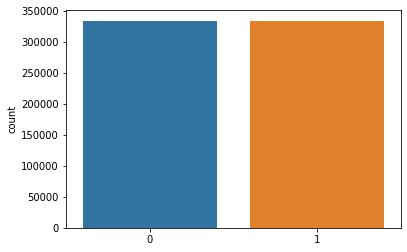

In [17]:
#visualização em um gráfico
ax = srn.countplot(x=yi)

**Criando uma função para usar nos gráficos de Radar Plot e Barras com os resultados da matriz de confusão**

In [27]:
def converteVetor(m):
    vetor = []
    for i in range(len(m)):
        for j in range(len(m[i])):
            vetor.append(m[i][j])
    return vetor

**Executando o algoritomo KNN**

In [19]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento_knn, X_teste_knn, y_treinamento_knn, y_teste_knn = train_test_split(previsores, classe, 
                                                                  test_size = 0.3,random_state = 0)
print(len(X_treinamento_knn))
print(len(X_teste_knn))

468158
200640


In [20]:
#realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala padrão.
sc = StandardScaler()  
X_treinamento_knn= sc.fit_transform(X_treinamento_knn)
X_teste_knn = sc.transform(X_teste_knn)

In [ ]:
#Aplicação da função PCA no treinamento  e conjunto de teste do componente X  
#pca_knn = PCA(n_components = 2)  
#X_treinamento_knn = pca_knn.fit_transform(X_treinamento_knn)
#X_teste_knn = pca_knn.transform(X_teste_knn)  
#explained_variance = pca_knn.explained_variance_ratio_

In [21]:
# Criação do modelo, treinamento, 
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_treinamento_knn, y_treinamento_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
#avalia o modelo com os dados de teste
knn.score(X_teste_knn,y_teste_knn)

0.8536682615629984

In [23]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, 
#a partir de um conjunto de dados.
cv_scores = cross_val_score(knn, previsores, classe, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.81471292 0.81497458 0.81421202 0.81359011 0.81719361]
Média dos Scores = 0.8149366488991074


In [24]:
#obtenção das previsões
previsoes_knn = knn.predict(X_teste_knn)
previsoes_knn

array([1, 0, 0, ..., 0, 1, 0])

In [25]:
# Visualização da matriz de confusão 
print(confusion_matrix(y_teste_knn,previsoes_knn))
print(pd.crosstab(y_teste_knn,previsoes_knn,rownames=['Real'],colnames=['Predito'],margins= True))


[[83126 17202]
 [12158 88154]]
Predito      0       1     All
Real                          
0        83126   17202  100328
1        12158   88154  100312
All      95284  105356  200640


In [83]:
#gerando o vetor
knn_vetor =  converteVetor(confusion_matrix(y_teste_knn,previsoes_knn))
knn_vetor

[83126, 17202, 12158, 88154]

In [29]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_knn = accuracy_score(y_teste_knn,previsoes_knn)
especificidade_knn = specificity_score(y_teste_knn,previsoes_knn)
precisao_knn = precision_score(y_teste_knn,previsoes_knn)
recall_knn = recall_score(y_teste_knn,previsoes_knn)
f1Score_knn = f1_score(y_teste_knn,previsoes_knn)
curva_roc_escore_knn = roc_auc_score(y_teste_knn,previsoes_knn)
kappa_knn = cohen_kappa_score(y_teste_knn,previsoes_knn)
print(f'Acurácia:{round(acuracia_knn,2)}')
print(f'Especificidade:{round(especificidade_knn,2)}')
print(f'Precisão:{round(precisao_knn,2)}')
print(f'Recall ou Sensibilidade:{round(recall_knn,2)}')
print(f'F1-Score:{round(f1Score_knn,2)}')
print(f'Kappa:{round(kappa_knn,2)}')
print(f'Curva ROC:{round(curva_roc_escore_knn,2)}')


Acurácia:0.85
Especificidade:0.83
Precisão:0.84
Recall ou Sensibilidade:0.88
F1-Score:0.86
Kappa:0.71
Curva ROC:0.85


In [ ]:
#skpltf.metrics.plot_roc(y_teste,previsoes, title="Roc Curve for XBG Classifier", figsize=(10, 8))
#plt.show()

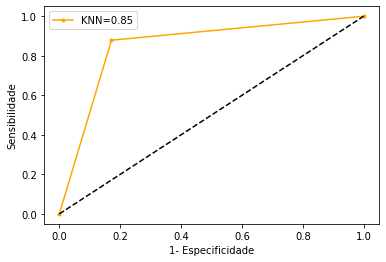

In [30]:
#Curva ROC
rfp_knn, rvp_knn,lim1 = roc_curve(y_teste_knn,previsoes_knn)
pyplot.plot(rfp_knn, rvp_knn, marker='.', label='KNN='+str(round(curva_roc_escore_knn,2)),color="orange")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade')
pyplot.ylabel('Sensibilidade')
# Legenda
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

**Random forest**

In [31]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento_rf, X_teste_rf, y_treinamento_rf, y_teste_rf = train_test_split(previsores, classe, 
                                                                  test_size = 0.3,random_state = 0)
print(len(X_treinamento_rf))
print(len(X_teste_rf))

468158
200640


In [32]:
#realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala padrão.
sc = StandardScaler()  
X_treinamento_rf = sc.fit_transform(X_treinamento_rf)
X_teste_rf = sc.transform(X_teste_rf)

In [33]:
#Aplicação da função PCA no treinamento  e conjunto de teste do componente X  
#pca = PCA(n_components = 2)  
#X_treinamento_rf = pca.fit_transform(X_treinamento_rf)
#X_teste_rf = pca.transform(X_teste_rf)  
#explained_variance = pca.explained_variance_ratio_

In [34]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
floresta = RandomForestClassifier(n_estimators = 10)
floresta.fit(X_treinamento_rf, y_treinamento_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
#avalia o modelo com os dados de teste
floresta.score(X_teste_rf,y_teste_rf)

0.9089264354066986

In [36]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, 
#a partir de um conjunto de dados.
cv_scores = cross_val_score(floresta, previsores, classe, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.68289474 0.95251196 0.95276615 0.95314708 0.95278822]
Média dos Scores = 0.8988216296879509


In [37]:
#obtenção das previsões
previsoes_rf = floresta.predict(X_teste_rf)
previsoes_rf

array([1, 0, 0, ..., 0, 1, 0])

In [38]:
# Visualização da matriz de confusão 
print(confusion_matrix(y_teste_rf,previsoes_rf))
print(pd.crosstab(y_teste_rf,previsoes_rf,rownames=['Real'],colnames=['Predito'],margins= True))

[[93749  6579]
 [11694 88618]]
Predito       0      1     All
Real                          
0         93749   6579  100328
1         11694  88618  100312
All      105443  95197  200640


In [84]:
#gerando o vetor
floresta_vetor =  converteVetor(confusion_matrix(y_teste_rf,previsoes_rf))
floresta_vetor

[93749, 6579, 11694, 88618]

In [40]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_rf = accuracy_score(y_teste_rf,previsoes_rf)
especificidade_rf = specificity_score(y_teste_rf,previsoes_rf)
precisao_rf = precision_score(y_teste_rf, previsoes_rf)
recall_rf = recall_score(y_teste_rf, previsoes_rf)
f1Score_rf = f1_score(y_teste_rf,previsoes_rf)
curva_roc_escore_rf = roc_auc_score(y_teste_rf, previsoes_rf)
kappa_rf = cohen_kappa_score(y_teste_rf, previsoes_rf)
print(f'Acurácia:{round(acuracia_rf,2)}')
print(f'Especificidade:{round(especificidade_rf,2)}')
print(f'Precisão:{round(precisao_rf,2)}')
print(f'Recall ou Sensibilidade:{round(recall_rf,2)}')
print(f'F1-Score:{round(f1Score_rf,2)}')
print(f'Kappa:{round(kappa_rf,2)}')
print(f'Curva ROC:{round(curva_roc_escore_rf,2)}')

Acurácia:0.91
Especificidade:0.93
Precisão:0.93
Recall ou Sensibilidade:0.88
F1-Score:0.91
Kappa:0.82
Curva ROC:0.91


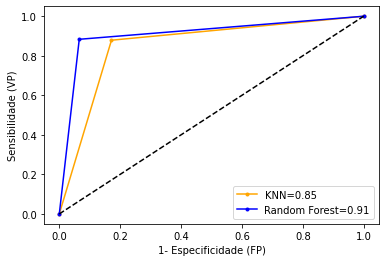

In [41]:
#Curva ROC
rfp_knn, rvp_knn,lim1 = roc_curve(y_teste_knn,previsoes_knn)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste_rf,previsoes_rf)
pyplot.plot(rfp_knn, rvp_knn, marker='.', label='KNN='+str(round(curva_roc_escore_knn,2)),color="orange")
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

**Árvores de Decisão**

In [42]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento_ar, X_teste_ar, y_treinamento_ar, y_teste_ar = train_test_split(previsores, classe, 
                                                                  test_size = 0.3,random_state = 0)
print(len(X_treinamento_ar))
print(len(X_teste_ar))

468158
200640


In [43]:
#realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala padrão.
sc = StandardScaler()  
X_treinamento_ar= sc.fit_transform(X_treinamento_ar)
X_teste_ar = sc.transform(X_teste_ar)

In [ ]:
#Aplicação da função PCA no treinamento  e conjunto de teste do componente X  
#pca = PCA(n_components = 2)  
#X_treinamento_ar = pca.fit_transform(X_treinamento_ar)
#X_teste_ar = pca.transform(X_teste_ar)  
#explained_variance = pca.explained_variance_ratio_

In [44]:
# Criação do modelo, treinamento, obtenção das previsões e da taxa de acerto
arvore = DecisionTreeClassifier()
arvore.fit(X_treinamento_ar, y_treinamento_ar)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [45]:
#avalia o modelo com os dados de teste
arvore.score(X_teste_ar,y_teste_ar)

0.8953498803827751

In [46]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, 
#a partir de um conjunto de dados.
cv_scores = cross_val_score(arvore, previsores, classe, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.67538876 0.93354516 0.93319378 0.93514455 0.93421003]
Média dos Scores = 0.8822964553746793


In [47]:
#obtenção das previsões
previsoes_ar = arvore.predict(X_teste_ar)
previsoes_ar

array([0, 0, 0, ..., 0, 1, 0])

In [48]:
# Visualização da matriz de confusão 
print(confusion_matrix(y_teste_ar,previsoes_ar))
print(pd.crosstab(y_teste_ar,previsoes_ar,rownames=['Real'],colnames=['Predito'],margins= True))

[[89451 10877]
 [10120 90192]]
Predito      0       1     All
Real                          
0        89451   10877  100328
1        10120   90192  100312
All      99571  101069  200640


In [85]:
#gerando o vetor
arvore_vetor =  converteVetor(confusion_matrix(y_teste_ar,previsoes_ar))
arvore_vetor

[89451, 10877, 10120, 90192]

In [50]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_ar = accuracy_score(y_teste_ar,previsoes_ar)
especificidade_ar = specificity_score(y_teste_ar,previsoes_ar)
precisao_ar = precision_score(y_teste_ar, previsoes_ar)
recall_ar = recall_score(y_teste_ar, previsoes_ar)
f1Score_ar = f1_score(y_teste_ar,previsoes_ar)
curva_roc_escore_ar = roc_auc_score(y_teste_ar, previsoes_ar)
kappa_ar = cohen_kappa_score(y_teste_ar, previsoes_ar)
print(f'Acurácia:{round(acuracia_ar,2)}')
print(f'Especificidade:{round(especificidade_ar,2)}')
print(f'Precisão:{round(precisao_ar,2)}')
print(f'Recall ou Sensibilidade:{round(recall_ar,2)}')
print(f'F1-Score:{round(f1Score_ar,2)}')
print(f'Kappa:{round(kappa_ar,2)}')
print(f'Curva ROC:{round(curva_roc_escore_ar,2)}')

Acurácia:0.9
Especificidade:0.89
Precisão:0.89
Recall ou Sensibilidade:0.9
F1-Score:0.9
Kappa:0.79
Curva ROC:0.9


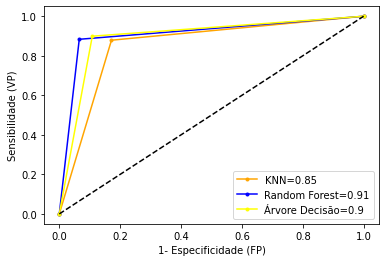

In [51]:
#Curva ROC
rfp_knn, rvp_knn,lim1 = roc_curve(y_teste_knn,previsoes_knn)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste_rf,previsoes_rf)
rfp_ar, rvp_ar,lim3 = roc_curve(y_teste_ar,previsoes_ar)
pyplot.plot(rfp_knn, rvp_knn, marker='.', label='KNN='+str(round(curva_roc_escore_knn,2)),color="orange")
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot(rfp_ar, rvp_ar, marker='.', label='Árvore Decisão='+str(round(curva_roc_escore_ar,2)),color="yellow")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
# Legenda
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

**Gradient Boosting**

In [52]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento_gra, X_teste_gra, y_treinamento_gra, y_teste_gra = train_test_split(previsores, classe, 
                                                                  test_size = 0.3,random_state = 0)
print(len(X_treinamento_gra))
print(len(X_teste_gra))

468158
200640


In [53]:
#realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala padrão.
sc = StandardScaler()  
X_treinamento_gra = sc.fit_transform(X_treinamento_gra)
X_teste_gra = sc.transform(X_teste_gra)

In [ ]:
#Aplicação da função PCA no treinamento  e conjunto de teste do componente X  
#pca = PCA(n_components = 2)  
#X_treinamento_gra = pca.fit_transform(X_treinamento_gra)
#X_teste_gra = pca.transform(X_teste_gra)  
#explained_variance = pca.explained_variance_ratio_

In [54]:
# Criação do modelo, treinamento, obtenção das previsões
gradient = GradientBoostingClassifier()
gradient.fit(X_treinamento_gra, y_treinamento_gra)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [55]:
#avalia o modelo com os dados de teste
gradient.score(X_teste_gra,y_teste_gra)

0.8662828947368421

In [56]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, 
#a partir de um conjunto de dados.
cv_scores = cross_val_score(gradient, previsores, classe, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.71216358 0.88329844 0.88321621 0.883634   0.88312562]
Média dos Scores = 0.8490875699156997


In [57]:
#obtenção das previsões
previsoes_gra = gradient.predict(X_teste_gra)
previsoes_gra

array([1, 0, 0, ..., 0, 1, 0])

In [58]:
# Visualização da matriz de confusão 
print(confusion_matrix(y_teste_gra,previsoes_gra))
print(pd.crosstab(y_teste_gra,previsoes_gra,rownames=['Real'],colnames=['Predito'],margins= True))

[[81263 19065]
 [ 7764 92548]]
Predito      0       1     All
Real                          
0        81263   19065  100328
1         7764   92548  100312
All      89027  111613  200640


In [86]:
#gerando o vetor
gradient_vetor =  converteVetor(confusion_matrix(y_teste_gra,previsoes_gra))
gradient_vetor

[81263, 19065, 7764, 92548]

In [60]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_gra = accuracy_score(y_teste_gra,previsoes_gra)
especificidade_gra = specificity_score(y_teste_gra,previsoes_gra)
precisao_gra = precision_score(y_teste_gra, previsoes_gra)
recall_gra = recall_score(y_teste_gra, previsoes_gra)
f1Score_gra = f1_score(y_teste_gra,previsoes_gra)
curva_roc_escore_gra = roc_auc_score(y_teste_gra, previsoes_gra)
kappa_gra = cohen_kappa_score(y_teste_gra, previsoes_gra)
print(f'Acurácia:{round(acuracia_gra,2)}')
print(f'Especificidade:{round(especificidade_gra,2)}')
print(f'Precisão:{round(precisao_gra,2)}')
print(f'Recall ou Sensibilidade:{round(recall_gra,2)}')
print(f'F1-Score:{round(f1Score_gra,2)}')
print(f'Kappa:{round(kappa_gra,2)}')
print(f'Curva ROC:{round(curva_roc_escore_gra,2)}')

Acurácia:0.87
Especificidade:0.81
Precisão:0.83
Recall ou Sensibilidade:0.92
F1-Score:0.87
Kappa:0.73
Curva ROC:0.87


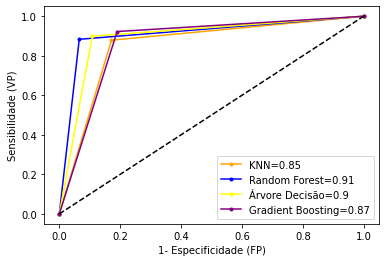

In [61]:
#Curva ROC
rfp_knn, rvp_knn,lim1 = roc_curve(y_teste_knn,previsoes_knn)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste_rf,previsoes_rf)
rfp_ar, rvp_ar,lim3 = roc_curve(y_teste_ar,previsoes_ar)
rfp_gra, rvp_gra,lim4 = roc_curve(y_teste_gra,previsoes_gra)
pyplot.plot(rfp_knn, rvp_knn, marker='.', label='KNN='+str(round(curva_roc_escore_knn,2)),color="orange")
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot(rfp_ar, rvp_ar, marker='.', label='Árvore Decisão='+str(round(curva_roc_escore_ar,2)),color="yellow")
pyplot.plot(rfp_gra, rvp_gra, marker='.', label='Gradient Boosting='+str(round(curva_roc_escore_gra,2)),color="purple")
pyplot.plot([0, 1], [0, 1], color='black', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
# Legenda
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

**SVM**

**A Execução da SVM com validação cruzada foi realizada localmente  em outro fonte e em um máquina local, devido ao tempo excedido de 8 horas de execução e, não suportado pelo Colab.**

In [ ]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores, classe, 
                                                                  test_size = 0.3,random_state = 0)
print(len(X_treinamento))
print(len(X_teste))

468158
200640


In [ ]:
#realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala padrão.
sc = StandardScaler()  
X_treinamento= sc.fit_transform(X_treinamento)
X_teste = sc.transform(X_teste)

In [ ]:
#Aplicação da função PCA no treinamento  e conjunto de teste do componente X  
#Fiz isso, pois o primeiro exemplo sem, ficou mais de três dia e não finalizou
pca = PCA(n_components = 3)  
X_treinamento = pca.fit_transform(X_treinamento)
X_teste = pca.transform(X_teste)

In [ ]:
#Avaliando o resultado da máquina
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[0.23672596 0.16630713 0.11519457]
[1104.11806114  925.4394275   770.20897228]


In [ ]:
# Criação do modelo, treinamento, obtenção das previsões
svm = SVC()
svm.fit(X_treinamento, y_treinamento)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#avalia o modelo com os dados de teste
svm.score(X_teste,y_teste)

0.819502591706539

In [ ]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, 
#a partir de um conjunto de dados.
cv_scores = cross_val_score(svm, previsores, classe, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

In [ ]:
#obtenção das previsões
previsoes_svm = svm.predict(X_teste)
previsoes_svm

NameError: ignored

In [ ]:
# Visualização da matriz de confusão 
print(confusion_matrix(y_teste,previsoes_svm))
print(pd.crosstab(y_teste,previsoes_svm,rownames=['Real'],colnames=['Predito'],margins= True))

[[68357 31971]
 [ 7678 92634]]
Predito      0       1     All
Real                          
0        68357   31971  100328
1         7678   92634  100312
All      76035  124605  200640


In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_svm = accuracy_score(y_teste,previsoes_svm)
especificidade_svm = specificity_score(y_teste,previsoes_svm)
precisao_svm = precision_score(y_teste, previsoes_svm)
recall_svm = recall_score(y_teste, previsoes_svm)
f1Score_svm = f1_score(y_teste,previsoes_svm)
curva_roc_escore_svm = roc_auc_score(y_teste, previsoes_svm)
kappa_svm = cohen_kappa_score(y_teste, previsoes_svm)
print(f'Acurácia:{round(acuracia_svm,4)}')
print(f'Especificidade:{round(especificidade_svm,4)}')
print(f'Precisão:{round(precisao_svm,4)}')
print(f'Recall ou Sensibilidade:{round(recall_svm,4)}')
print(f'F1-Score:{round(f1Score_svm,4)}')
print(f'Kappa:{round(kappa_svm,4)}')
print(f'Curva ROC:{round(curva_roc_escore_svm,4)}')

Acurácia:0.8024
Especificidade:0.6813
Precisão:0.7434
Recall ou Sensibilidade:0.9235
F1-Score:0.8237
Kappa:0.6048
Curva ROC:0.8024


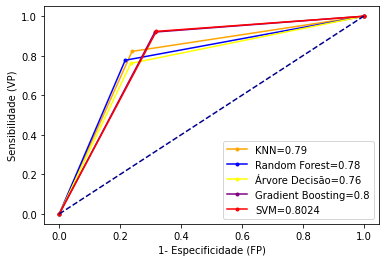

In [ ]:
#Curva ROC
rfp_knn, rvp_knn,lim1 = roc_curve(y_teste,previsoes_knn)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste,previsoes_rf)
rfp_ar, rvp_ar,lim3 = roc_curve(y_teste,previsoes_ar)
rfp_gra, rvp_gra,lim4 = roc_curve(y_teste,previsoes_gra)
rfp_svm, rvp_svm,lim5 = roc_curve(y_teste,previsoes_svm)
pyplot.plot(rfp_knn, rvp_knn, marker='.', label='KNN='+str(round(curva_roc_escore_knn,2)),color="orange")
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot(rfp_ar, rvp_ar, marker='.', label='Árvore Decisão='+str(round(curva_roc_escore_ar,2)),color="yellow")
pyplot.plot(rfp_gra, rvp_gra, marker='.', label='Gradient Boosting='+str(round(curva_roc_escore_gra,2)),color="purple")
pyplot.plot(rfp_svm, rvp_svm, marker='.', label='SVM='+str(round(curva_roc_escore_svm,4)),color="red")
pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
# Legenda
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

**XYZ - XGBoost**

In [62]:
#Divisão da base de dados entre treinamento e teste. Usamos 30% para testar e 70% para treinar. 
#Random_state = 0 para sempre obter a mesma divisão da base quando o código for executado
X_treinamento_xgb, X_teste_xgb, y_treinamento_xgb, y_teste_xgb = train_test_split(previsores, classe, 
                                                                  test_size = 0.3,random_state = 0)
print(len(X_treinamento_xgb))
print(len(X_teste_xgb))


468158
200640


In [63]:
#realizando a parte de pré-processamento no conjunto de treinamento, teste e ajustar a escala padrão.
sc = StandardScaler()  
X_treinamento_xgb = sc.fit_transform(X_treinamento_xgb)
X_teste_xgb = sc.transform(X_teste_xgb)
X_teste_xgb

array([[ 0.81615324,  0.04223258,  0.1155925 , ...,  0.21288853,
        -0.93475807,  0.93475807],
       [ 1.10611278,  0.04223258,  0.1155925 , ..., -1.15720805,
         1.23970589, -1.23970589],
       [-1.28605344,  0.04223258, -2.04040073, ..., -1.0850977 ,
         1.23970589, -1.23970589],
       ...,
       [-0.9960939 ,  0.04223258, -1.54286383, ..., -1.37353909,
        -0.93475807,  0.93475807],
       [ 1.32566754,  0.04223258,  0.1155925 , ..., -1.73409082,
        -0.93475807,  0.93475807],
       [-1.28605344,  0.04223258,  0.28143813, ...,  0.2609621 ,
         1.23970589, -1.23970589]])

In [ ]:
#Aplicação da função PCA no treinamento  e conjunto de teste do componente X  
#pca = PCA(n_components = 2)  
#X_treinamento_xgb = pca.fit_transform(X_treinamento_xgb)
#X_teste_xgb = pca.transform(X_teste_xgb)  
#explained_variance = pca.explained_variance_ratio_

In [64]:
# Criação do modelo, treinamento, obtenção das previsões
xgboost_m = XGBClassifier()
xgboost_m.fit(X_treinamento_xgb, y_treinamento_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [65]:
#avalia o modelo com os dados de teste
xgboost_m.score(X_teste_xgb,y_teste_xgb)


0.863302432216906

In [66]:
#Cross Validation. A validação cruzada é uma técnica para avaliar a capacidade de generalização de um modelo, 
#a partir de um conjunto de dados.
cv_scores = cross_val_score(xgboost_m, previsores, classe, cv=5, scoring='accuracy')
print(f'Scores = {cv_scores}')
print(f'Média dos Scores = {cv_scores.mean()}')

Scores = [0.73024073 0.87944827 0.87997159 0.88213877 0.88026974]
Média dos Scores = 0.850413819390716


In [67]:
#obtenção das previsões
previsoes_xgb = xgboost_m.predict(X_teste_xgb)
previsoes_xgb

array([1, 0, 0, ..., 0, 1, 0])

In [68]:
# Visualização da matriz de confusão 
print(confusion_matrix(y_teste_xgb,previsoes_xgb))
print(pd.crosstab(y_teste_xgb,previsoes_xgb,rownames=['Real'],colnames=['Predito'],margins= True))

[[80074 20254]
 [ 7173 93139]]
Predito      0       1     All
Real                          
0        80074   20254  100328
1         7173   93139  100312
All      87247  113393  200640


In [87]:
#gerando o vetor
xgb_vetor =   converteVetor(confusion_matrix(y_teste_xgb,previsoes_xgb))

In [70]:
#Curca ROC isoladamente
curva_roc_escore_xgb = roc_auc_score(y_teste_xgb, previsoes_xgb)
curva_roc_escore_xgb

0.8633076304203432

In [71]:
#Avaliação da máquina preditiva
r2_score(y_teste_xgb,previsoes_xgb)

0.45320972539045534

In [72]:
#Vericando os atributos com maior peso
#feature_import = xgboost_m.get_booster().get_score(importance_type = 'weight')
#keys = list(feature_import.keys())
#values = list(feature_import.values())

#data = pd.DataFrame(data= values, index = keys,columns=['score']).sort_values(by = 'score',ascending = True)
#data.plot(kind = 'barh')

In [78]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN), Especificidade, Precisão, Recall, F1-Score
acuracia_xgb = accuracy_score(y_teste_xgb,previsoes_xgb)
especificidade_xgb = specificity_score(y_teste_xgb,previsoes_xgb)
precisao_xgb = precision_score(y_teste_xgb, previsoes_xgb)
recall_xgb = recall_score(y_teste_xgb, previsoes_xgb)
f1Score_xgb = f1_score(y_teste_xgb,previsoes_xgb)
curva_roc_escore_xgb = roc_auc_score(y_teste_xgb, previsoes_xgb)
kappa_xgb = cohen_kappa_score(y_teste_xgb, previsoes_xgb)
print(f'Acurácia:{round(acuracia_xgb,2)}')
print(f'Especificidade:{round(especificidade_xgb,2)}')
print(f'Precisão:{round(precisao_xgb,2)}')
print(f'Recal ou Sensibilidade:{round(recall_xgb,2)}')
print(f'F1-Score:{round(f1Score_xgb,2)}')
print(f'Kappa:{round(kappa_xgb,2)}')
print(f'Curva ROC:{round(curva_roc_escore_xgb,2)}')

Acurácia:0.86
Especificidade:0.8
Precisão:0.82
Recal ou Sensibilidade:0.93
F1-Score:0.87
Kappa:0.73
Curva ROC:0.86


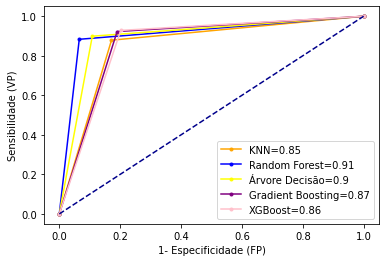

In [80]:
#Curva ROC
rfp_knn, rvp_knn,lim1 = roc_curve(y_teste_knn,previsoes_knn)
rfp_rf, rvp_rf,lim2 = roc_curve(y_teste_rf,previsoes_rf)
rfp_ar, rvp_ar,lim3 = roc_curve(y_teste_ar,previsoes_ar)
rfp_gra, rvp_gra,lim4 = roc_curve(y_teste_gra,previsoes_gra)
#rfp_svm, rvp_svm,lim5 = roc_curve(y_teste,previsoes_svm)
rfp_xgb, rvp_xgb,lim5 = roc_curve(y_teste_xgb,previsoes_xgb)
pyplot.plot(rfp_knn, rvp_knn, marker='.', label='KNN='+str(round(curva_roc_escore_knn,2)),color="orange")
pyplot.plot(rfp_rf, rvp_rf, marker='.', label='Random Forest='+str(round(curva_roc_escore_rf,2)),color="blue")
pyplot.plot(rfp_ar, rvp_ar, marker='.', label='Árvore Decisão='+str(round(curva_roc_escore_ar,2)),color="yellow")
pyplot.plot(rfp_gra, rvp_gra, marker='.', label='Gradient Boosting='+str(round(curva_roc_escore_gra,2)),color="purple")
#pyplot.plot(rfp_svm, rvp_svm, marker='.', label='SVM='+str(round(curva_roc_escore_svm,4)),color="red")
pyplot.plot(rfp_xgb, rvp_xgb, marker='.', label='XGBoost='+str(round(curva_roc_escore_xgb,2)),color="pink")
pyplot.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# alterando o nome dos eixos
pyplot.xlabel('1- Especificidade (FP)')
pyplot.ylabel('Sensibilidade (VP)')
# Legenda
pyplot.legend()
# Mostrando o gráfico
pyplot.show()

**Comparando e discutindo a diferença da visualização dos dados em um radar plot e em um gráfico de barras**

**Radar Plot**

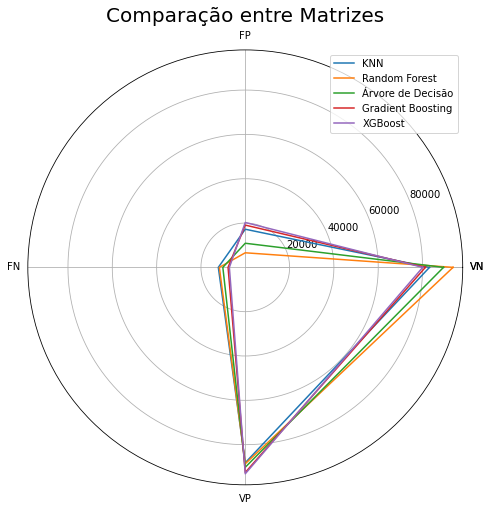

In [88]:
#Predito   N       P
#Real                          
#N        VN      FP   
#P        FN      VP
categories = ['VN', 'FP', 'FN', 'VP']
categories = [*categories, categories[0]]
#KNN
knn_vetor = [*knn_vetor,knn_vetor[0]]
#Ramdom Forest
floresta_vetor = [*floresta_vetor,floresta_vetor[0]]
#Árvores de decisão
arvore_vetor = [*arvore_vetor,arvore_vetor[0]]
#Gradient
gradient_vetor = [*gradient_vetor,gradient_vetor[0]]
#SVM
#svm_matriz = [76395,23933,7589,92723]  
#svm_matriz = [*svm_matriz,svm_matriz[0]]
#XGBoost
#xgb_vetor = [80506,19822,7273,93039] 
xgb_vetor = [*xgb_vetor,xgb_vetor[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(knn_vetor))
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
plt.plot(label_loc,knn_vetor,label='KNN')
plt.plot(label_loc, floresta_vetor, label='Random Forest')
plt.plot(label_loc, arvore_vetor, label='Árvore de Decisão')
plt.plot(label_loc, gradient_vetor, label='Gradient Boosting')
#plt.plot(label_loc, svm_matriz, label='SVM')
plt.plot(label_loc, xgb_vetor, label='XGBoost')
plt.title('Comparação entre Matrizes', size=20, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()

**Gráfico de Barras**

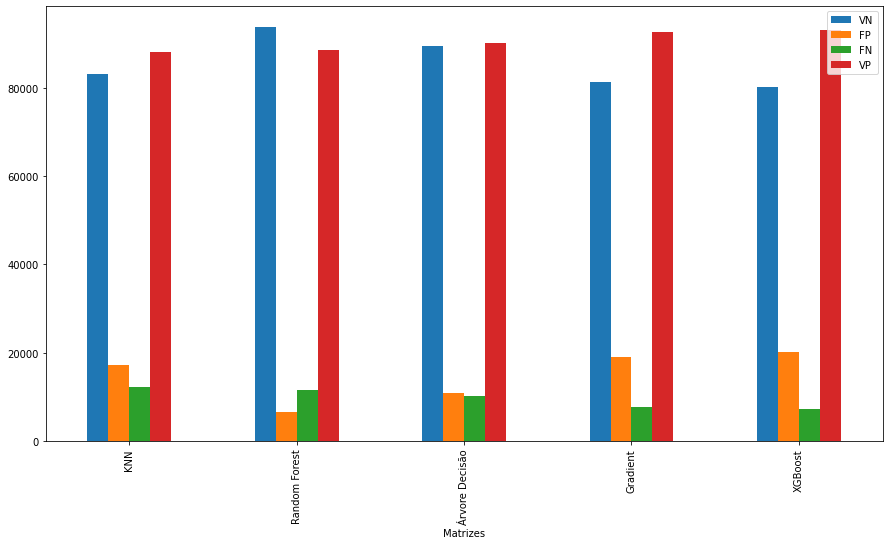

In [89]:
data = [['KNN',knn_vetor[0],knn_vetor[1],knn_vetor[2],knn_vetor[3]],
      ['Random Forest',floresta_vetor[0],floresta_vetor[1],floresta_vetor[2],floresta_vetor[3]],
      ['Árvore Decisão',arvore_vetor[0],arvore_vetor[1],arvore_vetor[2],arvore_vetor[3]],
      ['Gradient',gradient_vetor[0],gradient_vetor[1],gradient_vetor[2],gradient_vetor[3]],
      #['SVM',svm_matriz[0],svm_matriz[1],svm_matriz[2],svm_matriz[3]],
      ['XGBoost',xgb_vetor[0],xgb_vetor[1],xgb_vetor[2],xgb_vetor[3]]
     ]
df1 = pd.DataFrame(data,columns=['Matrizes','VN', 'FP', 'FN', 'VP'])
df1.plot(x="Matrizes", y=['VN', 'FP', 'FN', 'VP'], kind="bar",figsize=(15,8))
plt.show()